In [4]:
import hist
import pickle as pkl
from unfold_utils.unfolder import *
#import ipywidgets as widgets
from IPython.display import display
from unfold_utils.draw_tools import * 
from unfold_utils.integrate_and_rebin import *

In [5]:
%load_ext autoreload

%autoreload 2

In [6]:
title_list = [ r"$p_T$ 200-290 GeV",  r"$p_T$ 290-400 GeV",  r"$p_T$ 400-$\infty$ GeV"]#  r"$p_T$ 480-$\infty$ GeV"]
color_pt = ["#1f77b4", "#d62728", "#2ca02c", "#ff7f0e"]

In [23]:
closure  = False
groomed = False

In [24]:
ww16 =  (36330  * 75.95) /(15688000.0 + 15054400.0)

wz16 =  (36330  * 27.6)/( 7584000.0 + 7584000.0)

zz16 = (36330  * 12.17)/( 712000.0 + 1151000.0)

ww17 = (36330  * 75.95)/15154000.0
wz17 = (41480 * 27.6)/7789250.0
zz17 = (41480* 12.17 )/2022000.0

ww18 = (41480 * 75.95	)/9983800.0
wz18 = (41480 * 27.6)/10075000.0
zz18 = (41480* 12.17 )/1936000.0

f_prefix = 'plots/zjet/'

In [25]:
with open('latest_pkl/mpt/mpt_mc_1704.pkl', "rb") as f:
    output_pythia= pkl.load( f )
with open("latest_pkl/mpt/data_mpt_combined_1704.pkl", "rb") as f:
    output_data = pkl.load( f )

# with open("latest_pkl/herwig_0703.pkl", "rb") as f:
#     output_herwig = pkl.load( f )
    
# with open('latest_pkl/backgrounds_0703.pkl', "rb") as f:
#     output_bg= pkl.load( f )

# with open('latest_pkl/pythia_jk_0703.pkl', "rb") as f:
#     output_jk= pkl.load( f )
    


if not groomed:
    resp_matrix_4d = output_pythia['resp_mpt_u']
    input_data = output_data['m_over_pt_u']
    # fakes = output_pythia['fakes_u']
    # misses = output_pythia['misses_u']
    # hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    # resp_matrix_pythia = resp_matrix_4d
    # resp_matrix_4d_herwig  = output_herwig['response_matrix_u'][{'systematic':['herwig']}]
    # fakes_herwig = output_herwig['fakes_u']
    # misses_herwig = output_herwig['misses_u']
else:
    resp_matrix_4d = output_pythia['resp_mpt_g']
    input_data = output_data['m_over_pt_g']
    # fakes = output_pythia['fakes_g']
    # misses = output_pythia['misses_g']
    # hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    # resp_matrix_pythia = resp_matrix_4d
    # resp_matrix_4d_herwig = output_herwig['response_matrix_g'][{'systematic':['herwig']}]
   
    # fakes_herwig = output_herwig['fakes_g']
    # misses_herwig = output_herwig['misses_g']

In [26]:
resp_matrix_4d.axes['mpt_reco'].edges

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  7.5 , 10.  ])

In [27]:
resp_matrix_4d.axes['mpt_gen'].edges

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
       10. ])

In [28]:
if not groomed:
    # edges = [0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
    #        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
    #        0.45 , 0.475, 0.5  , 0.7  , 1.   ]
    edges = ([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3. ,  7.5 , 10.  ])

    edges = ([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  , 10  ])
    
    #edges_gen = [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 1.  ]
    edges_gen = [ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
       10. ]
if groomed:
    # edges = [0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
    #        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
    #        0.45 , 0.475, 0.5  , 0.7  , 1.   ]
    
    # edges_gen = [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 1.  ]

    # edges = [0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
    #        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
    #        0.45 , 0.475, 0.5  , 0.7  , 1.   ]
    edges = ([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  7.5 , 10.  ])
    
    #edges_gen = [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 1.  ]
    edges_gen = [ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
       10. ]
    
    edges = ([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3. ,  7.5 , 10.  ])

    edges = ([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  , 10  ])
    
    #edges_gen = [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 1.  ]
    edges_gen = [ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
       10. ]
    
pt_edges = [200, 290, 400, 13000]

resp_matrix_4d = rebin_hist(resp_matrix_4d, 'ptreco', pt_edges )
resp_matrix_4d = rebin_hist(resp_matrix_4d, 'ptgen', pt_edges )
    
resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mpt_reco',edges )

resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mpt_gen',edges_gen )
# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mreco',edges )
# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mgen',edges_gen )




# fakes =  rebin_hist(fakes, 'mreco',edges )
# misses = rebin_hist(misses, 'mgen',edges_gen )
# hist_bg = rebin_hist(hist_bg, 'mreco',edges )
input_data = rebin_hist(input_data, 'mpt_reco',edges)
input_data = rebin_hist(input_data, 'ptreco',pt_edges)

In [29]:
resp_matrix_4d

Hist(
  StrCategory(['UL16NanoAODv9', 'UL16NanoAODAPVv9', 'UL17NanoAODv9', 'UL18NanoAODv9'], growth=True, name='dataset', label='Primary dataset'),
  Variable([200, 290, 400, 13000], name='ptreco'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 10], name='mpt_reco'),
  Variable([200, 290, 400, 13000], name='ptgen'),
  Variable([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 10], name='mpt_gen'),
  Variable([0, 20, 10000], name='mreco', label='Mass (GeV)'),
  Variable([0, 20, 10000], name='mgen', label='Mass (GeV)'),
  StrCategory(['nominal'], growth=True, name='systematic', label='Systematic Uncertainty'),
  storage=Weight()) # Sum: WeightedSum(value=212463, variance=22496.7) (WeightedSum(value=259670, variance=32196.9) with flow)

In [30]:
input_data

Hist(
  StrCategory(['SingleElectron_UL2016', 'SingleMuon_UL2016', 'SingleElectron_UL2016APV', 'SingleMuon_UL2016APV', 'SingleElectron_UL2017', 'SingleMuon_UL2017', 'EGamma_UL2018', 'SingleMuon_UL2018'], growth=True, name='dataset', label='Primary dataset'),
  Variable([200, 290, 400, 13000], name='ptreco'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 10], name='mpt_reco'),
  Variable([0, 20, 10000], name='mreco', label='Mass (GeV)'),
  StrCategory(['nominal'], growth=True, name='systematic', label='Systematic Uncertainty'),
  storage=Weight()) # Sum: WeightedSum(value=327146, variance=327146) (WeightedSum(value=331532, variance=331532) with flow)

In [31]:
resp_matrix_4d = resp_matrix_4d[:,:,:,:,:, 1,1,:]
input_data = input_data[:,:,:,:,1]

IndexError: histogram index is out of range

In [ ]:
resp_matrix_4d

Hist(
  StrCategory(['UL16NanoAODv9', 'UL16NanoAODAPVv9', 'UL17NanoAODv9', 'UL18NanoAODv9'], growth=True, name='dataset', label='Primary dataset'),
  Variable([200, 290, 400, 13000], name='ptreco'),
  Variable(array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  7.5 , 10.  ]), name='mpt_reco'),
  Variable([200, 290, 400, 13000], name='ptgen'),
  Variable([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 10], name='mpt_gen'),
  StrCategory(['nominal'], growth=True, name='systematic', label='Systematic Uncertainty'),
  storage=Weight()) # Sum: WeightedSum(value=97587.3, variance=9854.6) (WeightedSum(value=114943, variance=13242.9) with flow)

In [32]:
if groomed:
    key = 'response_matrix_g'
else:
    key = 'response_matrix_u'

unfolder = Unfolder_mpt(input_data, 
                    resp_matrix_4d ,
                    #resp_matrix_4d_jk,
                    #fakes = fakes,
                    #misses = misses,
                    #backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                    #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                    #systematics = sys_matrix_dic,
                    systematics= None,
                    #systematics = jes_sys_list_up,
                    closure = False,
                    groomed = groomed,
                    is_uf = True,
                    merge = False,
                    normalised_xs = True,
                    do_syst = True,
                    discard_low_bins = False,
                    regularisation= 'ScanSURE',
                    do_norm = False
                           )

11
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.  10. ]
13
[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.   10.  ]
Signal Binning created
Detector Binning created
shape of you (39,)


/home/aritra/workspace/unfold/unfold_utils/unfolder.py:832: RuntimeWarning: invalid value encountered in divide
  self.underflow_frac = np.nan_to_num(h_np_underflow / self.M_np.sum(axis=0))


Unfolder object created
Condition number of the matrix  inf


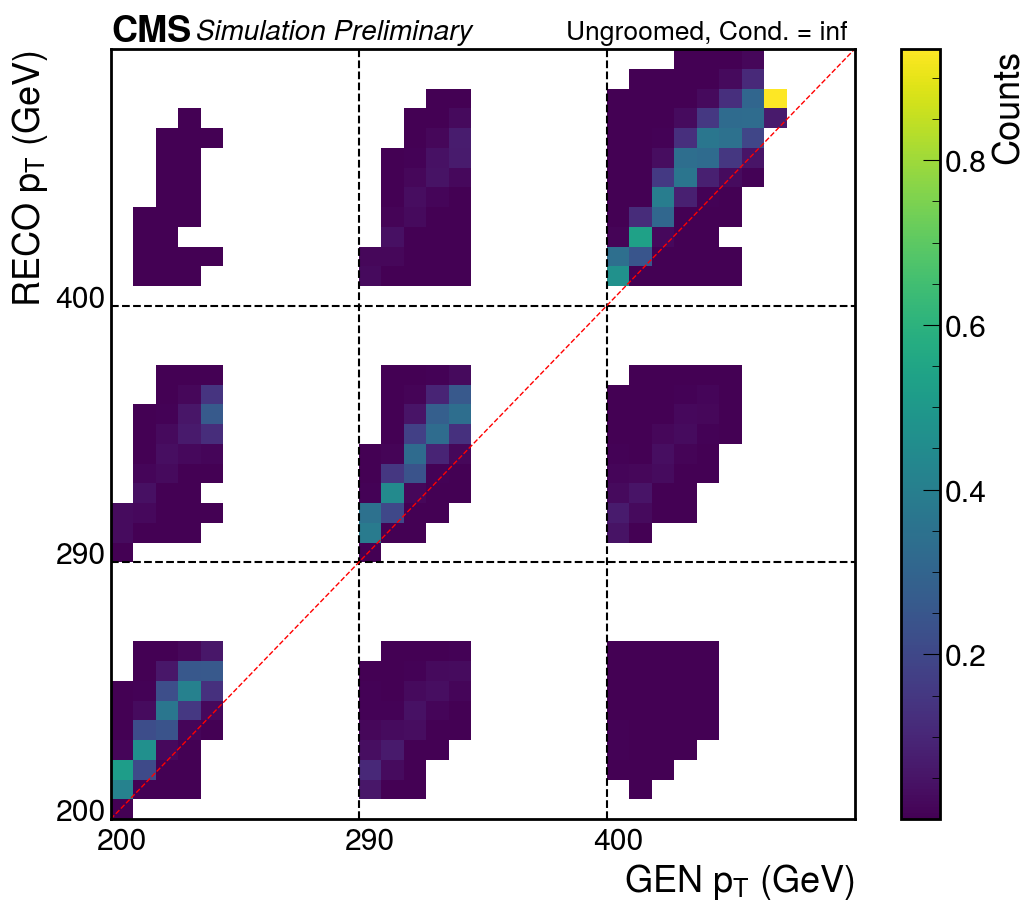

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 17 output bins do not depend on the input data  0 6-11 17-22 31-34
Info in <TUnfold::TUnfold>: 39 input bins and 18 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #6 (signal:ptgen[200,290]:massgen[2.5,3])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #7 (signal:ptgen[200,290]:massgen[3,3.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #8 (signal:ptgen[200,290]:massgen[3.5,4])
Info in <TUnfoldDensity::TUnfold>: 

In [33]:
unfolder.plot_response_matrix(probability_matrix = True)

In [34]:
unfolder.perform_unfold(regularisation='ScanLcurve')

Unfolder object created
Regularisation USED ScanLcurve
Tau value 0.0011064986324834975
Output Underflow 0.0, output overflow 0.0
257470.79934131948
257470.79934131954


Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 17 output bins do not depend on the input data  0 6-11 17-22 31-34
Info in <TUnfold::TUnfold>: 39 input bins and 18 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #6 (signal:ptgen[200,290]:massgen[2.5,3])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #7 (signal:ptgen[200,290]:massgen[3,3.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #8 (signal:ptgen[200,290]:massgen[3.5,4])
Info in <TUnfoldDensity::TUnfold>: 

In [247]:
-2* log10 (\rho^2)

SyntaxError: unexpected character after line continuation character (525430494.py, line 1)

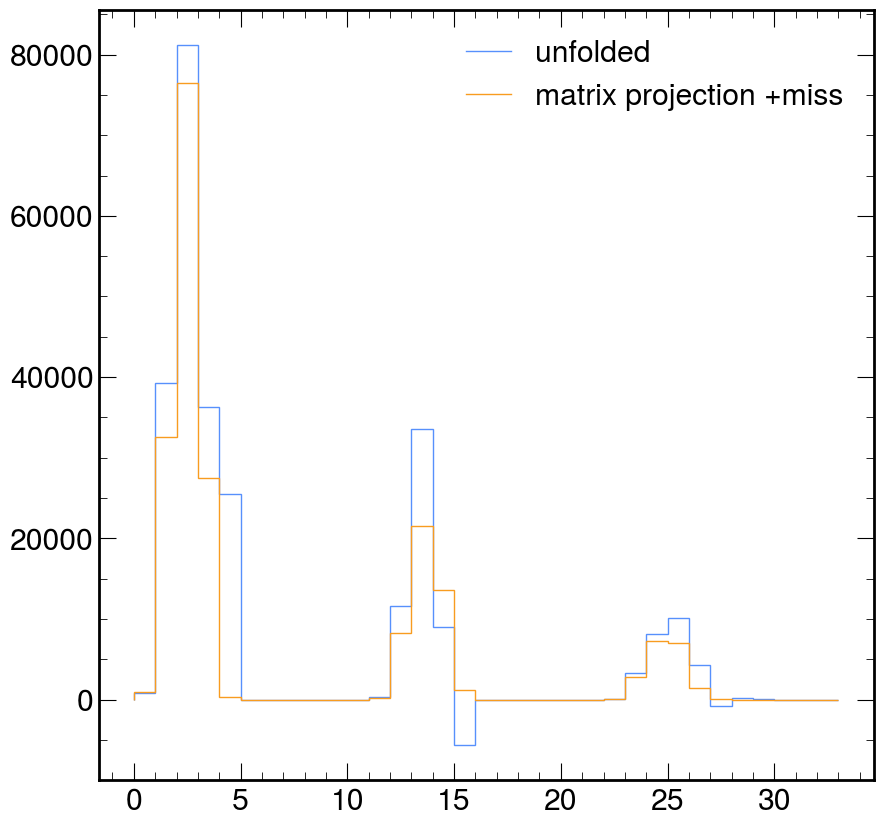

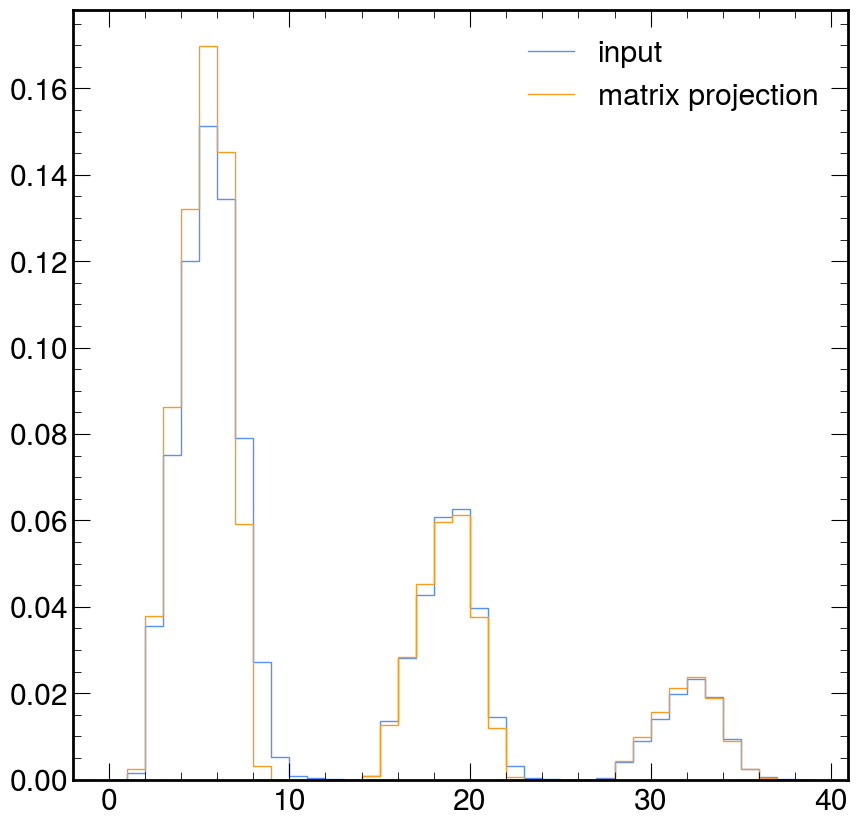

ValueError: operands could not be broadcast together with shapes (0,) (11,) 

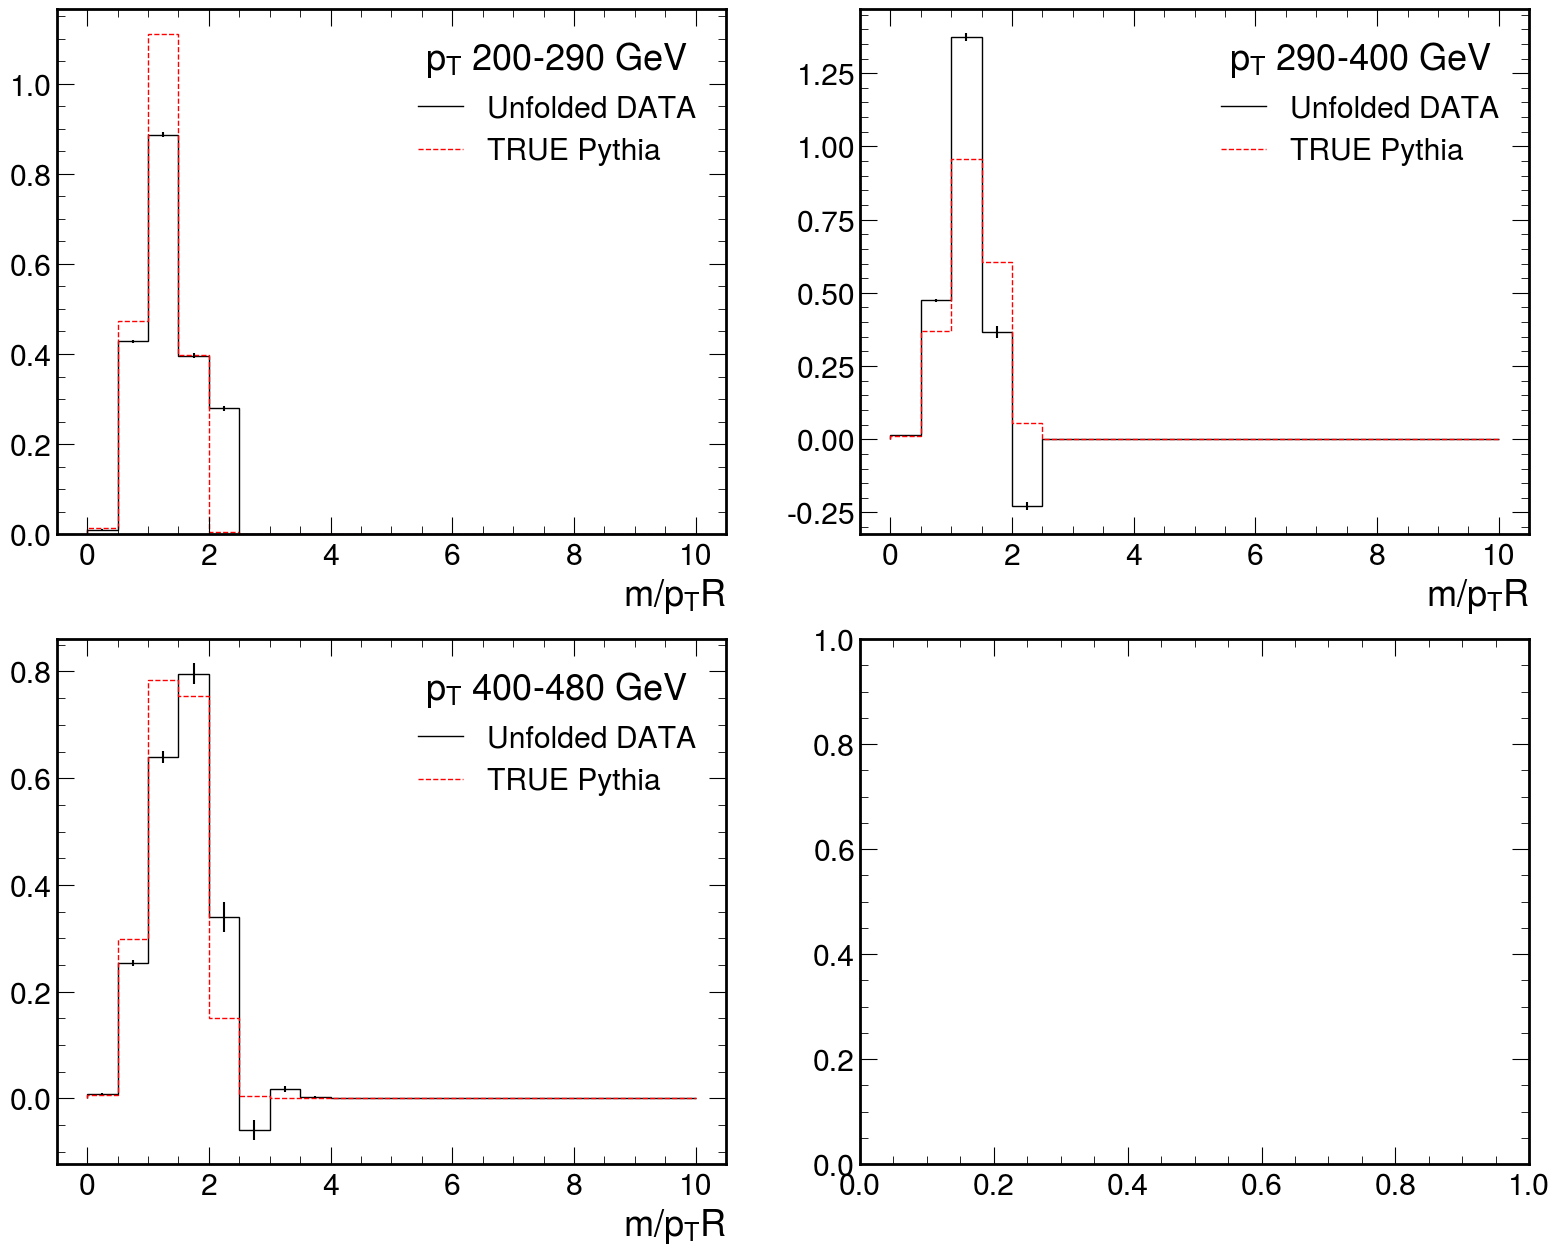

In [35]:
unfolder.plot_unfolded()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x75f96c4fbd10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

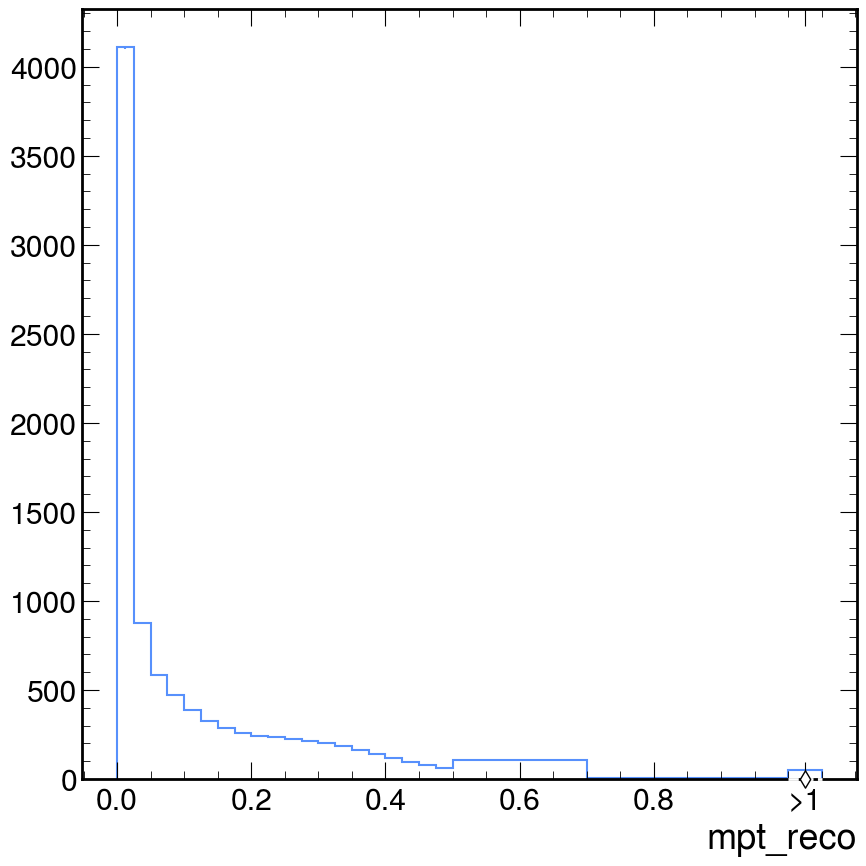

In [29]:
resp_matrix_4d.project('ptreco', 'mpt_reco')[3,:].plot(flow = 'show')